In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from scipy.stats import multivariate_normal
import seaborn as sns

from matplotlib import rc
sns.set_palette('colorblind')
sns.set_context('paper', font_scale=1.5)
sns.set_style('white')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [31]:
img = np.load('../matrices/NORMALIZED-RP-STACK.npy')

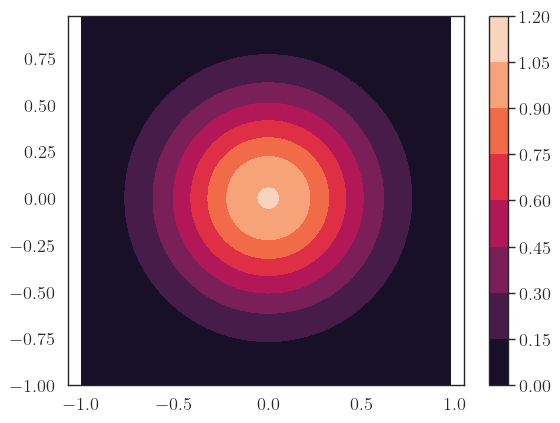

In [40]:
x,y = np.mgrid[-1:1:0.025, -1:1:0.025]
pos = np.dstack((x,y))
kernel = multivariate_normal([0.,0.], [[0.15, 0], [0, 0.15]])
plt.contourf(x,y,kernel.pdf(pos))
plt.axis('equal')
plt.colorbar()
plt.show()

In [41]:
print(img[:,:,300].shape)
print(kernel.pdf(pos).shape)

kernel = kernel.pdf(pos)
kernel = kernel/np.sum(kernel)

(1085, 1085)
(80, 80)


In [42]:
new_img = ndi.convolve(img[:,:,400], kernel, mode='constant', cval=0.0)


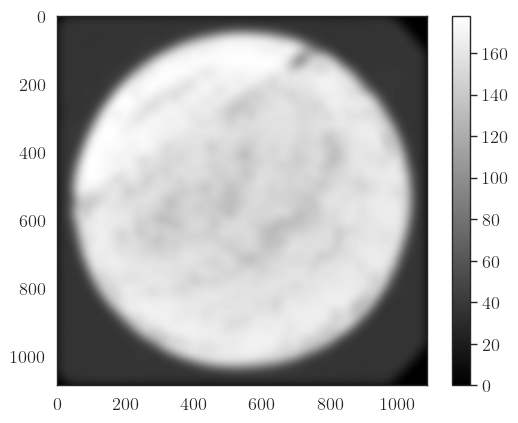

In [43]:
plt.imshow(new_img, cmap='gray')
plt.colorbar()
plt.show()

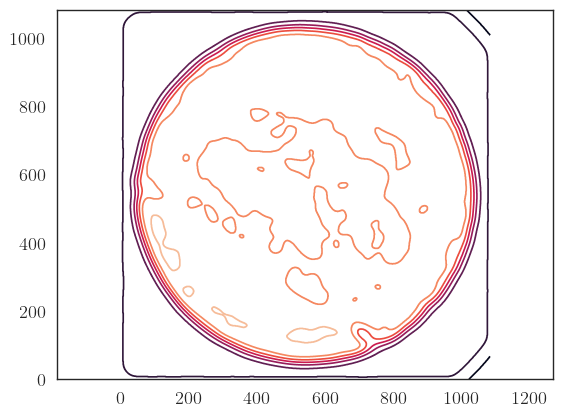

In [44]:
plt.contour(new_img)
plt.axis('equal')
plt.show()

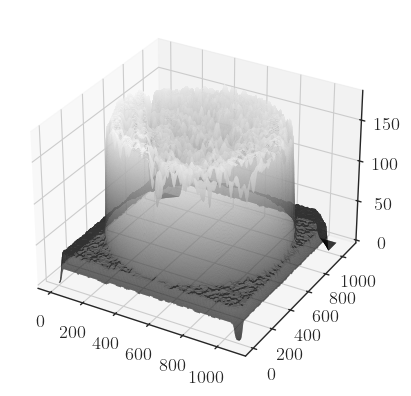

In [38]:
xx, yy = np.mgrid[0:new_img.shape[0], 0:new_img.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, new_img ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)

# show it
plt.show()